<a href="https://colab.research.google.com/github/tassiogomes/AprendendoGit/blob/main/MINDD_PL05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EDA

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from google.colab import drive
drive.mount('/content/drive')

df_clientes = pd.read_csv('drive/My Drive/MINDD/clientes.txt', sep='\t')
df_compras = pd.read_csv('drive/My Drive/MINDD/compras.txt', sep='\t')
df_clientes.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,client,sex,ownhome,salary,age
0,39808,M,N,27000,46
1,67362,F,N,30000,28
2,10872,M,N,13200,36
3,26748,F,N,12200,26
4,91609,M,Y,11000,24


In [15]:
df_compras.head()

,client,date,weekday,paymethod,value,product
0,11966,27-Dec-97,Saturday,card,22188,fruitvegs
1,12582,03-Dec-97,Wednesday,money,25601,charcuterie
2,13325,25-Dec-97,Thursday,card,41280,fish
3,13722,14-Dec-97,Sunday,card,36217,fish
4,13893,10-Dec-97,Wednesday,card,24804,meat


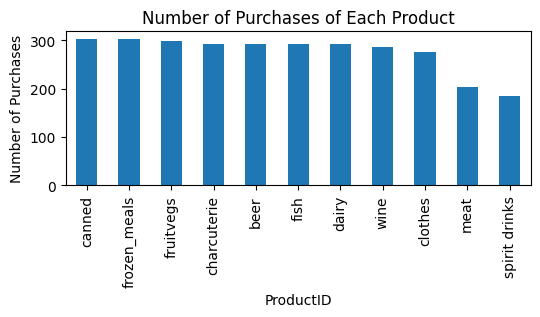

Number of customers: 1000
Number of different products sold: 11
Number of shopping baskets: 904
Number of purchases of each product:
----------------------------------------
canned           303
frozen_meals     302
fruitvegs        299
charcuterie      293
beer             293
fish             292
dairy            292
wine             286
clothes          276
meat             204
spirit drinks    184
Name: product, dtype: int64
(3024, 6)


In [30]:
num_customers = df_clientes['client'].nunique()
num_unique_products = df_compras['product'].nunique()
num_baskets = df_compras['client'].nunique()
product_purchases = df_compras['product'].value_counts()
# histogram
product_purchases.plot(kind='bar', figsize=(6, 2))
plt.title('Number of Purchases of Each Product')
plt.xlabel('ProductID')
plt.ylabel('Number of Purchases')
plt.show()


print(f'Number of customers: {num_customers}')
print(f'Number of different products sold: {num_unique_products}')
print(f'Number of shopping baskets: {num_baskets}')
print('Number of purchases of each product:')
print("----------------------------------------")
print(product_purchases)
print(df_compras.shape)


In [33]:
# Calcular o número de produtos vendidos em cada cesta
num_produtos_vendidos = df_compras.groupby('client')['product'].count()

# Contar o número de cestas por quantidade de produtos vendidos
contagem_baskets_por_produtos = num_produtos_vendidos.value_counts().reset_index()
contagem_baskets_por_produtos.columns = ['Number of Products Sold', 'Number of Baskets']

# Exibir informações
print('Count of baskets by number of products sold:')
print(contagem_baskets_por_produtos)


Count of baskets by number of products sold:
   Number of Products Sold  Number of Baskets
0                        2                197
1                        3                173
2                        1                154
3                        4                150
4                        5                115
5                        6                 52
6                        7                 40
7                        8                 19
8                        9                  2
9                       10                  2


In [ ]:
# Crie uma coluna que representa cada cesta
df_compras['Basket'] = df_compras.groupby('client').cumcount() + 1

# Crie uma tabela pivot com a representação one-hot das cestas
basket_pivot = pd.pivot_table(df_compras, values='value', index='Basket', columns='product', aggfunc=np.any, fill_value=False)

# Converta os valores booleanos em valores numéricos (0 e 1)
basket_pivot = basket_pivot.astype(int)

# Visualize a tabela pivot como uma representação one-hot das cestas
plt.figure(figsize=(12, 6))
plt.imshow(basket_pivot, cmap='YlGnBu', aspect='auto')
plt.title('One-Hot Encoded Basket Representation')
plt.xlabel('Products')
plt.ylabel('Baskets')
plt.colorbar(label='Presence (1) or Absence (0)')
plt.show()


In [64]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

basket_pivot = pd.pivot_table(df_compras, values='value', index='client', columns='product', aggfunc=np.any, fill_value=False)
basket_pivot = basket_pivot.astype(int)

frequent_itemsets5 = apriori(basket_pivot, min_support=0.05, use_colnames=True)
frequent_itemsets15 = apriori(basket_pivot, min_support=0.15, use_colnames=True)
frequent_itemsets25 = apriori(basket_pivot, min_support=0.25, use_colnames=True)

# Visualizar os conjuntos de itens frequentes
print("Frequent Itemsets with Min Support = 5%:")
print(frequent_itemsets5)
print("Frequent Itemsets with Min Support = 15%:")
print(frequent_itemsets15)
print("Frequent Itemsets with Min Support = 25%:")
print(frequent_itemsets25)

# Gerar as regras de associação
rules = association_rules(frequent_itemsets5, metric="lift", min_threshold=1.0)

# Exibir as regras de associação
print("Association Rules:")
print(rules)


Frequent Itemsets with Min Support = 5%:
      support                                        itemsets
0    0.324115                                          (beer)
1    0.335177                                        (canned)
2    0.324115                                   (charcuterie)
3    0.305310                                       (clothes)
4    0.323009                                         (dairy)
..        ...                                             ...
115  0.055310        (fish, frozen_meals, dairy, charcuterie)
116  0.054204           (fruitvegs, fish, dairy, charcuterie)
117  0.053097        (canned, charcuterie, beer, fish, dairy)
118  0.055310  (charcuterie, beer, frozen_meals, fish, dairy)
119  0.054204     (charcuterie, beer, fruitvegs, fish, dairy)

[120 rows x 2 columns]
Frequent Itemsets with Min Support = 15%:
     support                                   itemsets
0   0.324115                                     (beer)
1   0.335177                         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

In [65]:
# Classifique as regras com base no lift em ordem decrescente
top_15_lift_rules = rules.sort_values(by='lift', ascending=False).head(15)

# Exiba as 15 regras com o maior lift
print(top_15_lift_rules)

                         antecedents               consequents  \
265             (dairy, charcuterie)              (beer, fish)   
448       (beer, frozen_meals, fish)      (dairy, charcuterie)   
264              (charcuterie, fish)             (beer, dairy)   
263                    (beer, dairy)       (charcuterie, fish)   
262                     (beer, fish)      (dairy, charcuterie)   
416     (canned, dairy, charcuterie)              (beer, fish)   
417             (canned, fish, beer)      (dairy, charcuterie)   
474   (fruitvegs, fish, charcuterie)             (beer, dairy)   
475  (fruitvegs, dairy, charcuterie)              (beer, fish)   
449      (beer, frozen_meals, dairy)       (fish, charcuterie)   
477          (beer, fish, fruitvegs)      (dairy, charcuterie)   
478         (beer, dairy, fruitvegs)       (fish, charcuterie)   
418            (canned, dairy, beer)       (fish, charcuterie)   
483              (fish, charcuterie)  (beer, dairy, fruitvegs)   
484       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# Defina os critérios
min_support = 0.15  # Suporte mínimo de 15%
min_confidence = 0.95  # Confiança mínima de 95%
min_lift = 2.5  # Lift mínimo de 2.5

# Aplique os filtros para encontrar as regras que atendem aos critérios
filtered_rules = rules[(rules['support'] > min_support) & (rules['confidence'] > min_confidence) & (rules['lift'] > min_lift)]

# Exiba as regras que atendem aos critérios
print(filtered_rules)


                             antecedents    consequents  antecedent support  \
2                                 (beer)  (charcuterie)            0.324115   
3                          (charcuterie)         (beer)            0.324115   
20                               (dairy)         (fish)            0.323009   
21                                (fish)        (dairy)            0.323009   
30                        (beer, canned)  (charcuterie)            0.184735   
32                 (canned, charcuterie)         (beer)            0.184735   
66                  (beer, frozen_meals)  (charcuterie)            0.188053   
68           (frozen_meals, charcuterie)         (beer)            0.188053   
178                   (dairy, fruitvegs)         (fish)            0.160398   
179                    (fish, fruitvegs)        (dairy)            0.160398   
220         (beer, frozen_meals, canned)  (charcuterie)            0.161504   
223  (canned, frozen_meals, charcuterie)         (be

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# Especifique o item que você deseja encontrar na consequente
target_item = 'beer'

# Aplique um filtro para encontrar as regras que incluem o item na consequente
canned_rules = rules[rules['consequents'].apply(lambda consequent: target_item in consequent)]

# Exiba as regras que incluem o item na consequente
print(canned_rules)


               antecedents                            consequents  \
1                 (canned)                                 (beer)   
3            (charcuterie)                                 (beer)   
5           (frozen_meals)                                 (beer)   
32   (canned, charcuterie)                                 (beer)   
34                (canned)                    (beer, charcuterie)   
..                     ...                                    ...   
490          (dairy, fish)         (beer, fruitvegs, charcuterie)   
491          (charcuterie)         (beer, dairy, fish, fruitvegs)   
493            (fruitvegs)       (beer, dairy, fish, charcuterie)   
494                 (fish)  (beer, fruitvegs, dairy, charcuterie)   
495                (dairy)   (beer, fruitvegs, fish, charcuterie)   

     antecedent support  consequent support   support  confidence      lift  \
1              0.335177            0.324115  0.184735    0.551155  1.700492   
3            

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Suponha que 'rules' seja o DataFrame com as regras de associação

# Itens que desejamos encontrar no antecedente
target_items = {'fish', 'fruitvegs'}

# Função para verificar se ambos os itens estão no antecedente
def contains_target_items(antecedent):
    return all(item in antecedent for item in target_items)

# Aplique um filtro para encontrar as regras que incluem os itens no antecedente
fish_fruitvegs_rules = rules[rules['antecedents'].apply(contains_target_items)]

# Exiba as regras que incluem os itens no antecedente
print(fish_fruitvegs_rules)


                               antecedents                 consequents  \
104                      (fish, fruitvegs)                      (beer)   
160                      (fish, fruitvegs)               (charcuterie)   
179                      (fish, fruitvegs)                     (dairy)   
308                (beer, fish, fruitvegs)               (charcuterie)   
311         (charcuterie, fish, fruitvegs)                      (beer)   
315                      (fish, fruitvegs)         (beer, charcuterie)   
347                (beer, fish, fruitvegs)                     (dairy)   
349               (fish, dairy, fruitvegs)                      (beer)   
354                      (fish, fruitvegs)               (beer, dairy)   
396               (dairy, fish, fruitvegs)               (charcuterie)   
397         (charcuterie, fish, fruitvegs)                     (dairy)   
400                      (fish, fruitvegs)        (dairy, charcuterie)   
466   (beer, fruitvegs, fish, charcute

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Suponha que 'basket_pivot' seja a tabela pivot com a representação one-hot das cestas
# Supmin = 1% (0.01) e Confmin = 10% (0.10)
frequent_itemsets = apriori(basket_pivot, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


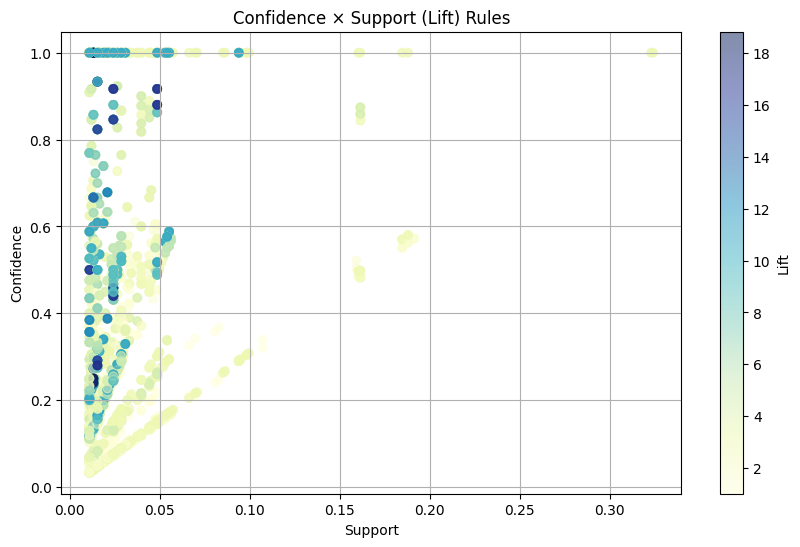

In [71]:
import matplotlib.pyplot as plt

# Gráfico de dispersão da Confiança x Suporte (com cores representando o Lift)
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='YlGnBu', marker='o', alpha=0.5)
plt.title('Confidence × Support (Lift) Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
cbar = plt.colorbar()
cbar.set_label('Lift')
plt.grid(True)
plt.show()
